In [1]:
import numpy as np
import pandas as pd
import csv

with open(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv") as dms_GFP_datei:
    dms_GFP_datei_object = csv.reader(dms_GFP_datei, delimiter=',')
    print(dms_GFP_datei_object)
    for row in dms_GFP_datei_object:
        print(row)
GFP_dataset = pd.read_csv(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv")
print(GFP_dataset)
#Import the dataset
letzter_buchstabe = []
for index, row in GFP_dataset.iterrows():
    last_character = row["mutant"][-1]
    letzter_buchstabe.append(last_character)
letzter_buchstabe_df = pd.DataFrame(letzter_buchstabe, columns=["New_AS"])
#Letzter Buchstabe in jeder Zeile

number_mutations = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df = letzter_buchstabe_df[number_mutations_Single]
#Filtert alle True Zeilen aus beiden Dataframes und erstellt ein neues Dataframe. Er übernimmt automatisch die Filterung nach "True"-Werten
dms_score_df = []
for index, row in GFP_dataset.iterrows():
    dms_score = row["DMS_score"]
    dms_score_df.append(dms_score)
dms_score_df_alle = pd.DataFrame(dms_score_df, columns=["Fitness_Score"])
#erstellt Dataframe mit allen DMS-scores und der jeweiligen Experimentnummer

dms_score_filtered = dms_score_df_alle[number_mutations_Single]
#Dataframe mit allen DMS-scores der Einzelmutanten

dms_score_filtered_newAS = single_mutants_df.join(dms_score_filtered)
print(dms_score_filtered_newAS)
#Kombiniert und erstellt ein neues Dataframe mit der neuen AS und dem jeweiligen DMS-score
mutations_pos = []
for index, row in GFP_dataset.iterrows():
    mutations_pos_nummer = row["mutant"][1:-1]
    mutations_pos.append(mutations_pos_nummer)
mutations_pos_df = pd.DataFrame(mutations_pos, columns=["Position"])
#Entfernt erstmal nur das erste und letzte Zeichen
number_mutations = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df_pos = mutations_pos_df[number_mutations_Single]
#Erstellt ein Dataframe, dass die Positionen innerhalb des Proteins aller Einzelmutanten zeigt

mutations_pos_df_mit_scores = single_mutants_df_pos.join(dms_score_filtered)
#Kombiniert und erstellt Dataframe mit der Position der Mutation und dem jeweiligen DMS-score (zeigt NICHT die neuen AS)
new_column = mutations_pos_df_mit_scores["Position"]
Roman_1 = dms_score_filtered_newAS.join(new_column)
Roman_1 = Roman_1[["Position", "New_AS", "Fitness_Score"]]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                      mutant  \
0      K3R:V55A:Q94R:A110T:D117G:M153K:D216A   
1                       K3Q:V16A:I167T:L195Q   
2                K3Q:Y143C:N164D:S205P:A227T   
3                            K3Q:Y143N:V193A   
4                                        K3R   
...                                      ...   
51709                                  Y237N   
51710                                  Y237C   
51711                                  Y237D   
51712                                  Y237F   
51713                                  Y237H   

                                        mutated_sequence  DMS_score  \
0      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.301030   
1      MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.137350   
2      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.553913   
3      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.404237   
4      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.738586 

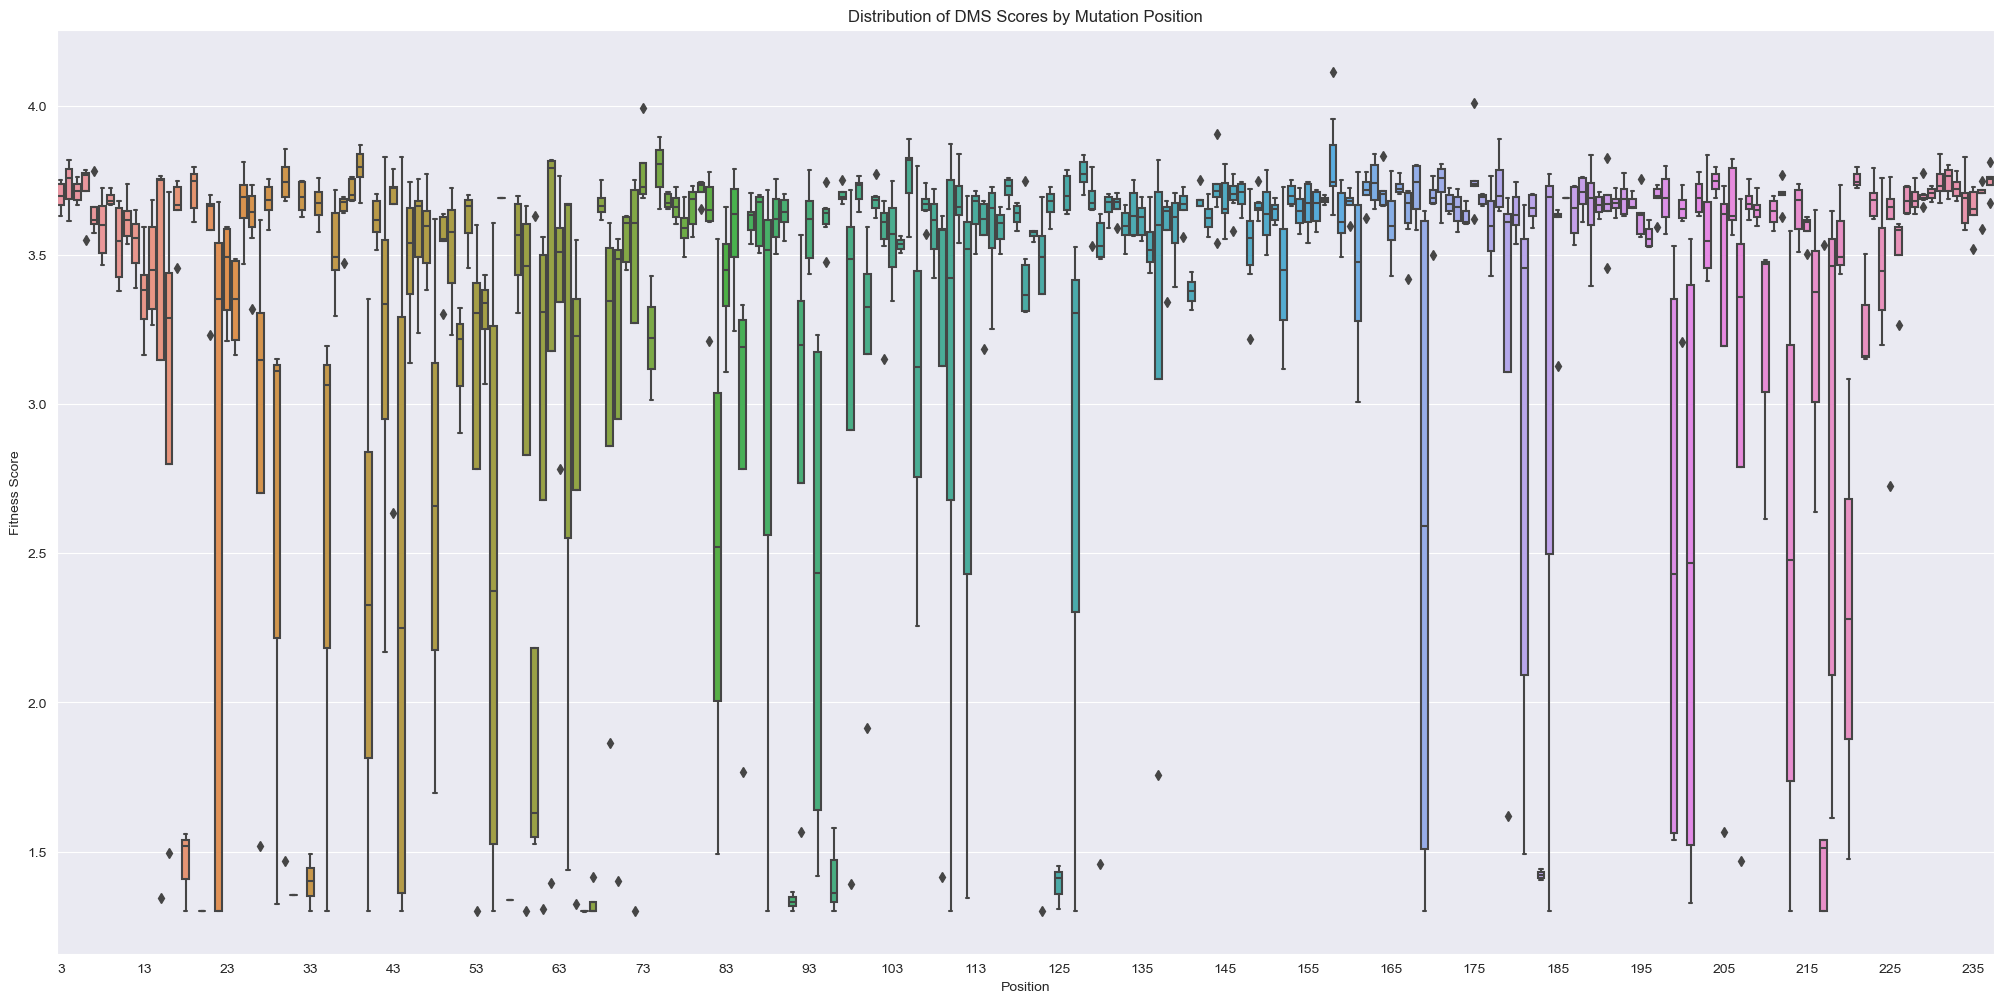

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already grouped the data by mutation position
grouped_by_position = Roman_1.groupby('Position')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_position:
    dms_scores_per_group.append(group['Fitness_Score'])

# Create a box plot
sns.boxplot(x='Position', y='Fitness_Score', data=Roman_1)
plt.xlabel('Position')
plt.ylabel('Fitness Score')
plt.title('Distribution of DMS Scores by Mutation Position')
plt.xticks(range(0, len(grouped_by_position), 10))
plt.gcf().set_size_inches(25, 12)
plt.show()


In [2]:
from scipy.stats import f_oneway

# Assuming you have already grouped the data by mutation position
grouped_by_position = Roman_1.groupby('Position')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_position:
    dms_scores_per_group.append(group['Fitness_Score'])

# Perform the ANOVA
statistic, p_value = f_oneway(*dms_scores_per_group)

# Print the test results
print("ANOVA")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")
#In the case of a one-way ANOVA, the test statistic follows an F-distribution. The F-statistic represents the ratio of the between-group variability to the within-group variability. A larger F-statistic indicates a greater difference between the groups' means relative to the variability within each group.
#Extension of t-test for independent samples and checks if there are statistically significant differences between >2 groups
#ANOVA without repeated measurements weil alle Gruppen unabhängig sind
#Independent variable = position
#Dependent variable = dms-score
#Nullhypothese = Kein Unterschied zwischen der Mittelwerte der einzelnen Gruppen
#H1-Hypothese = Es gibt einen Unterschied zwischen mindestens 2 Gruppen


ANOVA
Statistic: 5.099899894789866
P-value: 1.3068900184318954e-68


In [3]:
from scipy.stats import f_oneway

# Assuming you have already grouped the data by mutation position
grouped_by_amino_acid = Roman_1.groupby('New_AS')

# Create an empty list to store the DMS scores for each group
dms_scores_per_group_new_AS = []

# Iterate over each group and extract the DMS scores
for position, group in grouped_by_amino_acid:
    dms_scores_per_group.append(group['Fitness_Score'])

# Perform the ANOVA
statistic, p_value = f_oneway(*dms_scores_per_group)

# Print the test results
print("ANOVA")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

ANOVA
Statistic: 4.229398763758684
P-value: 1.1976536846179361e-73


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have a dataframe named 'Roman_1' with columns 'Position', 'New_AS', and 'DMS_score'

# Perform the ANOVA
model = ols('Fitness_Score ~ Position + New_AS', data=Roman_1).fit()
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print('ANOVA:')
print(anova_table)
#df = degrees of freedom
#sum_sq = The sum of squares quantifies the variation explained by each factor. Higher values indicate more significant effects.
#mean_sq = It is obtained by dividing the sum of squares by the respective degrees of freedom. The mean square represents the average variation explained by each factor.
#F = It is the ratio of the mean square of each factor to the mean square of the residual. The F-value indicates the significance of the factor in explaining the variation in the DMS score. Higher F-values suggest a more significant effect.
#PR(>F) = A smaller p-value suggests stronger evidence against the null hypothesis and indicates a significant effect.

##Position hat einen signifikanten Einfluss --> Es gibt signifikante Unterschiede im Fitness-score zwischen verschiedenen mutierten Positionen.

##Die neue Aminosäure hat auch einen signifikanten Einfluss --> Es gibt signifikante Unterschiede im Fitness-score zwischen verschiedenen neuen Aminosäuren.

##Der Residual repräsentiert die unerklärte Varianz des Datensets, die nicht durch Position oder neue Aminosäure erklärbar sind.

###Es scheint eine Korrelation zwischen dem Fitness-score und der Position bzw. der neuen Aminosäure zu geben.

ANOVA:
             df      sum_sq   mean_sq         F        PR(>F)
Position  232.0  243.851576  1.051084  6.003194  1.301208e-82
New_AS     19.0   29.717435  1.564076  8.933106  1.507908e-23
Residual  832.0  145.672832  0.175088       NaN           NaN


In [6]:
# Assuming you have performed the ANOVA and stored the result in 'anova_result'
sum_sq_position = anova_table.loc['Position', 'sum_sq']
SST = anova_table['sum_sq'].sum()

eta_squared_position = sum_sq_position / SST
print(eta_squared_position)
#Effect Size Calculation: Common effect size measures for ANOVA include eta-squared (η²) or partial eta-squared (η²p).
#These measures indicate the proportion of variance in the DMS score that can be explained by the mutated position or the new amino acid.
#The higher the eta-squared value, the more influence the mutated position has on the DMS score.

##58% der Varianz können durch die Position erklärt werden! --> Starke Beziehung zwischen mutierter Position und DMS-score

0.5816489450614979


In [7]:
sum_sq_new_as = anova_table.loc['New_AS', 'sum_sq']
SST = anova_table['sum_sq'].sum()

eta_squared_new_as = sum_sq_new_as / SST
print(eta_squared_new_as)
##Nur 7% der Varianz werden hier erklärt. Das heißt, die neu entstandene Aminosäure hat nicht so einen großen Einfluss. --> Schwache Beziehung
#Die restliche Varianz steck im residual

0.07088375323670729


In [8]:
from statsmodels.stats.multitest import multipletests

# Assuming you have the ANOVA results in the variable 'anova_table'

# Extract the p-values from the ANOVA results
p_values = anova_table['PR(>F)']

# Apply the Bonferroni correction
corrected_p_values = multipletests(p_values, method='bonferroni')[1]

# Add the corrected p-values to the ANOVA table
anova_table['Corrected P-value'] = corrected_p_values

# Print the updated ANOVA table with corrected p-values
print(anova_table)
#The correction did not have a lot of influence
#the Bonferroni correction is a conservative correction method that controls the family-wise error rate (FWER) by dividing the desired significance level (e.g., 0.05) by the number of comparisons.

             df      sum_sq   mean_sq         F        PR(>F)  \
Position  232.0  243.851576  1.051084  6.003194  1.301208e-82   
New_AS     19.0   29.717435  1.564076  8.933106  1.507908e-23   
Residual  832.0  145.672832  0.175088       NaN           NaN   

          Corrected P-value  
Position       3.903625e-82  
New_AS         4.523723e-23  
Residual                NaN  


In [9]:
#Test, ob Normalverteilt
from scipy.stats import shapiro

# Shapiro-Wilk-Test
stat, p = shapiro(Roman_1["Fitness_Score"])
alpha = 0.05

if p > alpha:
    print("Daten sind normalverteilt (H0 nicht ablehnen)")
else:
    print("Daten sind nicht normalverteilt (H0 ablehnen)")
print()
print(p)

Daten sind nicht normalverteilt (H0 ablehnen)

0.0


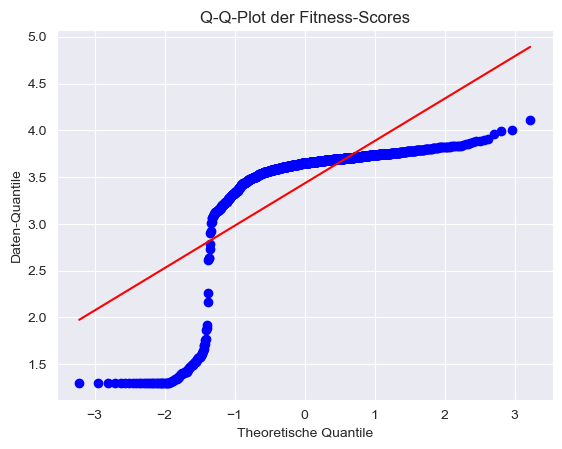

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Extrahiert die Spalte mit den Fitness-Scores
fitness_scores = Roman_1['Fitness_Score'].values

# Q-Q-Plot erstellen
probplot(fitness_scores, dist="norm", plot=plt)

# Beschriftungen hinzufügen
plt.title("Q-Q-Plot der Fitness-Scores")
plt.xlabel("Theoretische Quantile")
plt.ylabel("Daten-Quantile")

# Plot anzeigen
plt.show()


In [16]:
import scipy.stats as stats

grouped_position = Roman_1.groupby('Position')
grouped_AS = Roman_1.groupby("New_AS")

for position, group_position in grouped_position:
    for AS, group_AS in grouped_AS:
        fitness_scores_position = group_position['Fitness_Score'].values
        fitness_scores_AS = group_AS['Fitness_Score'].values

        statistic, p_value = stats.mannwhitneyu(fitness_scores_position, fitness_scores_AS, alternative='two-sided')

        alpha = 0.05

        print(f"Position: {position}, Aminosäure: {AS}")
        print(f"Wilcoxon-Mann-Whitney-Test")
        print(f"Teststatistik: {statistic}")
        print(f"P-Wert: {p_value}")

        if p_value < alpha:
            print("Es gibt einen signifikanten Unterschied.")
        else:
            print("Es gibt keinen signifikanten Unterschied.")

        print()


Position: 3, Aminosäure: A
Wilcoxon-Mann-Whitney-Test
Teststatistik: 309.0
P-Wert: 0.07903999942950264
Es gibt keinen signifikanten Unterschied.

Position: 3, Aminosäure: C
Wilcoxon-Mann-Whitney-Test
Teststatistik: 138.0
P-Wert: 0.5458683473389355
Es gibt keinen signifikanten Unterschied.

Position: 3, Aminosäure: D
Wilcoxon-Mann-Whitney-Test
Teststatistik: 206.0
P-Wert: 0.06800168158561219
Es gibt keinen signifikanten Unterschied.

Position: 3, Aminosäure: E
Wilcoxon-Mann-Whitney-Test
Teststatistik: 158.5
P-Wert: 0.1411780759135085
Es gibt keinen signifikanten Unterschied.

Position: 3, Aminosäure: F
Wilcoxon-Mann-Whitney-Test
Teststatistik: 103.0
P-Wert: 0.1487479155885228
Es gibt keinen signifikanten Unterschied.

Position: 3, Aminosäure: G
Wilcoxon-Mann-Whitney-Test
Teststatistik: 227.0
P-Wert: 0.1265500160030068
Es gibt keinen signifikanten Unterschied.

Position: 3, Aminosäure: H
Wilcoxon-Mann-Whitney-Test
Teststatistik: 180.0
P-Wert: 0.13864332732257262
Es gibt keinen signifikan

In [17]:
import pandas as pd
import scipy.stats as stats


#Ich will meine Werte sortieren
def position_sort(position):
    if position.isdigit():
        return int(position)
    else:
        return position


#Leere Liste
results = []
#Gruppierung basierend auf Position und Aminosäure
grouped_position = Roman_1.groupby('Position')
grouped_AS = Roman_1.groupby("New_AS")

# Konvertiert die Positionsspalte in numerische Werte
Roman_1['Position'] = pd.to_numeric(Roman_1['Position'])

#Whitney-Test für alle Kombinationen von Position und AS durchgeführt --> Signifikanter Unterschied in den Fitness-Scores zwischen verschiedenen Positionen und AS?
for position, group_position in grouped_position:
    for AS, group_AS in grouped_AS:
        fitness_scores_position = group_position['Fitness_Score'].values
        fitness_scores_AS = group_AS['Fitness_Score'].values

        statistic, p_value = stats.mannwhitneyu(fitness_scores_position, fitness_scores_AS, alternative='two-sided')
        #Alpha-Wert selbst gesetzt
        alpha = 0.05

        result = {'Position': position, 'Aminosäure': AS, 'Teststatistik': statistic, 'P-Wert': p_value,
                  'Signifikanz': "Ja" if p_value < alpha else "Nein"}

        results.append(result)
#Ergebnisse ausspucken lassen
summary_df = pd.DataFrame(results)
#Sortieren nach aufsteigender Positionsnummer
summary_df = summary_df.sort_values('Position', ascending=True)
print(summary_df)

#Wenn p-Wert <0,05 (alpha), dann signifikant --> Fitness-Score zwischen den Gruppen nicht gleich

##Wenn der p-Wert klein ist (typischerweise kleiner als 0,05), deutet dies darauf hin, dass es einen statistisch signifikanten Unterschied in den Fitness-Scores zwischen den Positionen und Aminosäuren gibt.

##Wenn der p-Wert größer als 0,05 ist, wird die Nullhypothese beibehalten, was bedeutet, dass kein statistisch signifikanter Unterschied in den Fitness-Scores zwischen den Positionen und Aminosäuren vorliegt.

#Verwendet für große Stichproben und nicht normalverteilt

#Der Mann-Whitney-U-Test wird verwendet, um zu prüfen, ob es statistisch signifikante Unterschiede in den Verteilungen der Fitness-Scores zwischen den Positionen und Aminosäuren gibt.

#Nullhypothese: Es gibt keinen signifikanten Unterschied in den Fitness-Scores zwischen den verschiedenen Positionen und Aminosäuren.

      Position Aminosäure  Teststatistik    P-Wert Signifikanz
0            3          A          309.0  0.079040        Nein
19           3          Y          144.0  0.232238        Nein
18           3          W           13.0  0.142857        Nein
17           3          V          255.0  0.318906        Nein
16           3          T          193.5  0.404197        Nein
...        ...        ...            ...       ...         ...
4641       237          C          175.5  0.074290        Nein
4640       237          A          368.0  0.002568          Ja
4658       237          W           14.0  0.071429        Nein
4648       237          K          137.0  0.004080          Ja
4659       237          Y          177.0  0.016339          Ja

[4660 rows x 5 columns]


In [18]:
# Überprüft, ob Position und Aminosäure in Roman_1 vorhanden sind
mask = summary_df.apply(lambda row: (row['Position'], row['Aminosäure']) in zip(Roman_1['Position'], Roman_1['New_AS']),
                        axis=1)

# Filtert das summary_df entsprechend der Maske
summary_df_filtered = summary_df[mask]

print(summary_df_filtered)


      Position Aminosäure  Teststatistik    P-Wert Signifikanz
16           3          T          193.5  0.404197        Nein
13           3          Q          129.5  0.349664        Nein
10           3          M          116.5  0.493878        Nein
14           3          R          262.5  0.199731        Nein
3            3          E          158.5  0.141178        Nein
...        ...        ...            ...       ...         ...
4651       237          N          275.5  0.007773          Ja
4646       237          H          216.5  0.010993          Ja
4644       237          F          123.5  0.014056          Ja
4642       237          D          243.5  0.004776          Ja
4641       237          C          175.5  0.074290        Nein

[1084 rows x 5 columns]


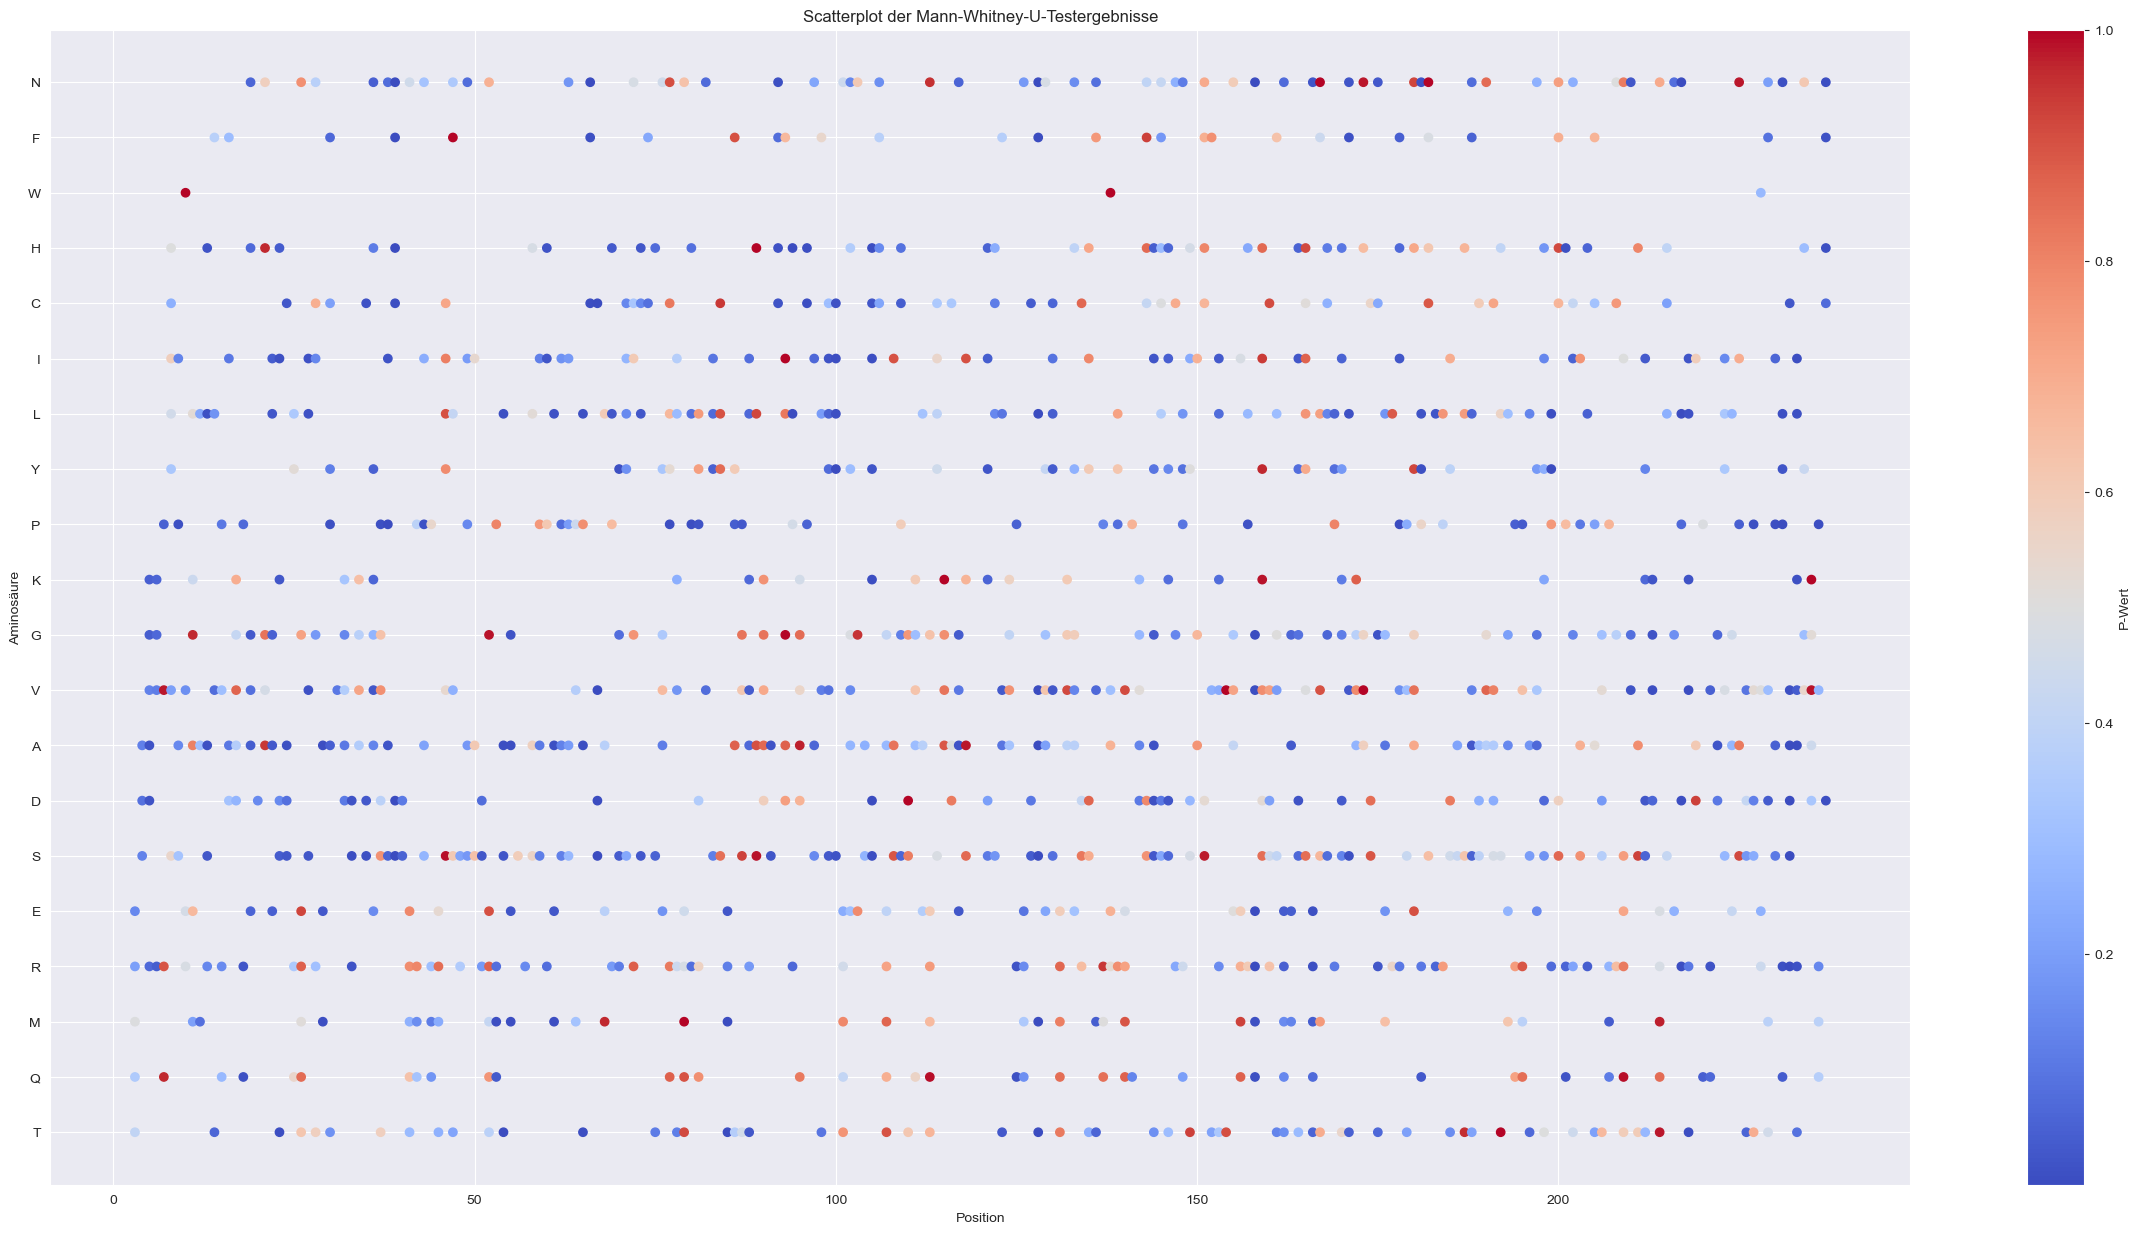

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Annahme: 'summary_df' ist das DataFrame mit den Ergebnissen des Mann-Whitney-U-Tests

# Scatterplot erstellen
plt.figure(figsize=(30, 15))  # Größe des Plots anpassen

# Position und Aminosäure auf den Achsen darstellen
plt.scatter(summary_df_filtered['Position'], summary_df_filtered['Aminosäure'], c=summary_df_filtered['P-Wert'],
            cmap='coolwarm')

# Achsentitel und Titel des Plots festlegen
plt.xlabel('Position')
plt.ylabel('Aminosäure')
plt.title('Scatterplot der Mann-Whitney-U-Testergebnisse')

# Farbskala hinzufügen
cbar = plt.colorbar()
cbar.set_label('P-Wert')

# Plot anzeigen
plt.show()


In [20]:
#Der Kruskal-Wallis-Test ist eine nichtparametrische Methode, die auf Ränge basiert und daher keine Annahmen über die Verteilung der Daten macht. Er ermöglicht den Vergleich der Verteilungen zwischen mehreren Gruppen, unabhängig von ihrer Normalverteilung oder Varianzhomogenität.
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position erstellen
grouped_position_2 = Roman_1.groupby('Position')

# Liste zum Speichern der Fitness-Scores für jede Position
position_scores = []

# Schleife über die Positionen
for position, group_data in grouped_position_2:
    # Fitness-Scores für die aktuelle Position
    fitness_scores = group_data['Fitness_Score'].values
    position_scores.append(fitness_scores)

# Kruskal-Wallis-Test
statistic, p_value = stats.kruskal(*position_scores)

alpha = 0.05

print("Kruskal-Wallis-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen.")


Kruskal-Wallis-Test
Teststatistik: 577.8469817125756
P-Wert: 1.8399990857612868e-31
Es gibt einen signifikanten Unterschied zwischen den Positionen.


In [21]:
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position und Aminosäure erstellen
grouped_position_as_2 = Roman_1.groupby(['Position', 'New_AS'])

# Liste zum Speichern der Fitness-Scores für jede Position und Aminosäure
position_as_scores = []

# Schleife über die Positionen und Aminosäuren
for (position, amino_acid), group_data in grouped_position_as_2:
    # Fitness-Scores für die aktuelle Position und Aminosäure
    fitness_scores = group_data['Fitness_Score'].values
    position_as_scores.append(fitness_scores)
#Die Fitness-Scores für jede Position und Aminosäure werden in einer Liste gespeichert und als Argumente für den Kruskal-Wallis-Test verwendet
# Kruskal-Wallis-Test
statistic, p_value = stats.kruskal(*position_as_scores)

alpha = 0.05

print("Kruskal-Wallis-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")


Kruskal-Wallis-Test
Teststatistik: 1083.0
P-Wert: 0.49428529234990104
Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.


In [23]:
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position und Aminosäure erstellen
grouped_position_as_4 = Roman_1.groupby(['Position', 'New_AS'])

# Liste zum Speichern der Fitness-Scores pro Gruppe
fitness_scores_groups = []

# Schleife über die Positionen und Aminosäuren
for (position, amino_acid), group_data in grouped_position_as_4:
    # Fitness-Scores für die aktuelle Position und Aminosäure
    scores = group_data['Fitness_Score'].values

    # Fitness-Scores zur Liste hinzufügen
    fitness_scores_groups.append(scores)

# Friedman-Test
statistic, p_value = stats.friedmanchisquare(*fitness_scores_groups)

alpha = 0.05

print("Friedman-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
#Der Friedman-Test wird verwendet, wenn du dieselben Proben in den verschiedenen Gruppen hast und die Daten abhängig sind (z.B. wiederholte Messungen an denselben Proben). Der Kruskal-Wallis-Test hingegen wird verwendet, wenn du unabhängige Stichproben hast.

#Da du denselben Datensatz verwendest, scheinen die Fitness-Scores abhängig zu sein, und daher ist es nicht überraschend, dass sowohl der Friedman-Test als auch der Kruskal-Wallis-Test zu ähnlichen Ergebnissen führen.
#

Friedman-Test
Teststatistik: 1083.0
P-Wert: 0.49428529234990104
Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.
